Text(0.5, 1.0, 'bior')

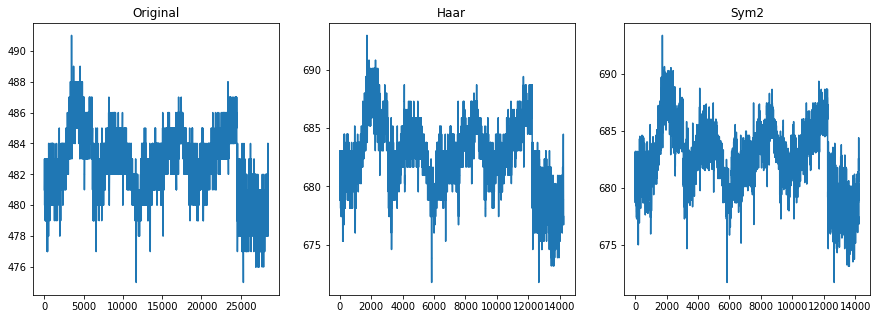

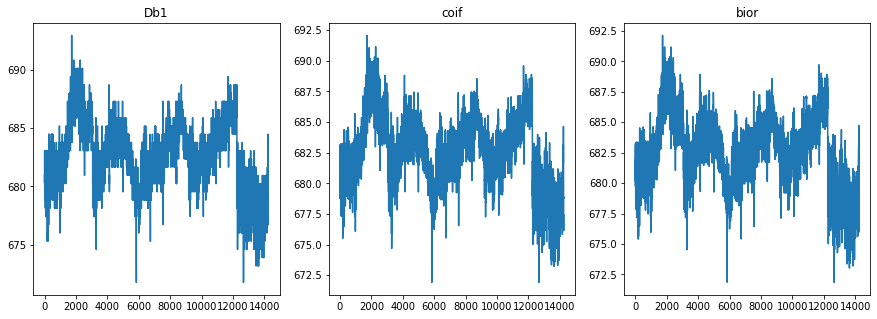

In [2]:
import os
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pywt
import data_loader


def get_frequencie(emg_data):
    result = np.fft.fft(emg_data, axis=0)
    print(result)
    plt.plot(result)
    plt.show()
    return result

def apply_butter_filter(emg_data, freq):
    butter_filter = signal.butter(2, freq, analog=True, output='sos')
    #result = np.fft.ifft(butter_filter * fft_freq[:,1])
    return signal.sosfilt(butter_filter, emg_data)


#folderpath = r"..\..\Acquisition\Data\Dataset_avec_angles_tester"
#emg_data, angle_data = data_loader.load_data(folderpath)
#get_frequencie(emg_data)

data = np.load("../../Acquisition/Data/7_electrodes_Philippe/regroupement_des donnes_par_categorie/test_data_with_freestyle/shoulder_extension_3s_2000Hz.npy")
# #print(data.shape)
# result = apply_butter_filter(data, 10000)
# get_frequencie(result)
# plt.plot(result)

a = pywt.dwt(data[:,3],'haar')[0]
b = pywt.dwt(data[:,3],'sym2')[0]
c = pywt.dwt(data[:,3],'db1')[0]
d = pywt.dwt(data[:,3],'coif1')[0]
e = pywt.dwt(data[:,3],'bior6.8')[0]

#print(pywt.wavelist(kind='discrete'))

plt.rcParams["figure.figsize"] = (15, 5)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.plot(data[:,3])
ax2.plot(a)
ax3.plot(b)
ax1.set_title('Original')
ax2.set_title('Haar')
ax3.set_title('Sym2')

plt.rcParams["figure.figsize"] = (15, 5)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.plot(c)
ax2.plot(d)
ax3.plot(e)
ax1.set_title('Db1')
ax2.set_title('coif')
ax3.set_title('bior')
